In [6]:
from matplotlib import pyplot as plt

from src.glow import Glow
from src.data import DigitsDataset

In [2]:
dataset = DigitsDataset()

In [3]:
c, h, w = dataset[0][0].shape
glow = Glow(c, h, w, levels=3, steps_per_level=5, multi_scale=True)

In [4]:
loss_list = glow.train(dataset, batch_size=128, max_epochs=400, log_interval=50)

plt.plot(loss_list)
plt.show()

 - Epoch   2: 7.658
 - Epoch   4: 7.480
 - Epoch   6: 7.488
 - Epoch   8: 7.382
 - Epoch  10: 7.223


NameError: name 'plt' is not defined

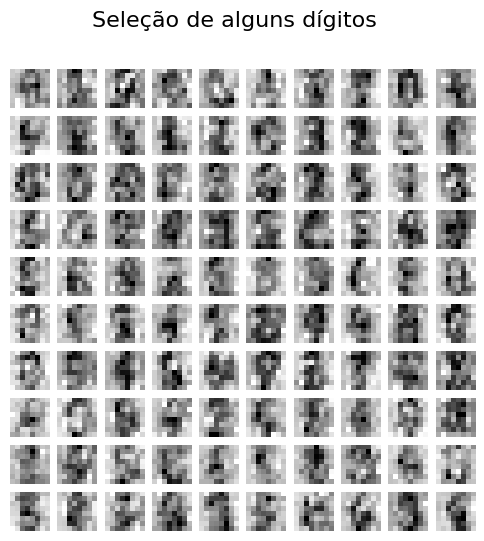

In [7]:
n_samples = 100
samples, log_prob = glow.sample(n_samples)
samples = samples[:, 0, :, :]
images = samples[log_prob.argsort(), :].reshape(n_samples, h, w).cpu().detach().numpy()

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(images[idx, :, :], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Seleção de alguns dígitos", fontsize=16)